# 🌧️ **Rainfall Prediction Analysis** 🚀  

## 📝 **Metadata**  
- **📅 Date:** [2025-03-07]  
- **👨‍💻 Author:** Muhammad Hassan Saboor  
- **🛠️ Tools Used:** Python, Pandas, Seaborn, Matplotlib, PyCaret   
- **🎯 Goal:** Perform an end-to-end exploratory data analysis (EDA)

---

## 📌 **Steps Performed**  

### 1️⃣ Basic Dataset Understanding  
✔️ Checked for **missing values** and **data types** (`df.info()`, `df.isnull().sum()`).  
✔️ Verified **ID uniqueness** (`df['id'].nunique() vs. len(df)`).  
✔️ Ensured **numerical columns** have expected ranges (`df.describe()`).  

### 2️⃣ Target Variable Analysis 🌦️  
✔️ Examined the **distribution of rainfall** occurrences (`df['rainfall'].value_counts()`).  
✔️ Identified **class imbalance** (rainy vs. non-rainy days).  
✔️ **Visualized** rainfall distribution with a **bar chart**.  
✔️ **Computed the ratio** of rainy days to non-rainy days.  

### 3️⃣ Univariate Analysis 📊  
✔️ Plotted **histograms & KDE plots** to analyze feature distributions.  
✔️ Used **boxplots** to detect outliers in **pressure, humidity, wind speed, etc.**  
✔️ Checked **skewness and kurtosis** for numerical features.  
✔️ Analyzed if specific **days have a higher chance of rain**.  

### 4️⃣ Bivariate Analysis 🔗  
✔️ Used **pairplots** to identify relationships between continuous variables.  
✔️ Examined **rainfall occurrence vs. temperature ranges** (boxplots).  
✔️ Analyzed **humidity, wind direction, dew point, and cloud cover** in relation to rainfall.  

### 5️⃣ Correlation Analysis 🔥  
✔️ Computed a **correlation matrix** (`df.corr()`).  
✔️ Visualized **correlations using a heatmap** to identify redundant features.  
✔️ Detected **highly correlated variables** to address multicollinearity.  

### 7️⃣ Feature Engineering Ideas 🏗️  
✔️ Created **temperature range** (`maxtemp - mintemp`).  
✔️ Categorized **wind direction** into bins (`North, South, East, West`).  
✔️ Converted **days into weekend vs. weekday** to check impact on rainfall.  
✔️ Created **interaction terms** (e.g., `humidity × cloud`).  
✔️ Generated a **binary sunshine variable** (`sunshine > threshold`).  

### 8️⃣ Outliers Detection 🚨  
✔️ Applied **IQR method** to detect extreme outliers.  
✔️ Used **Z-score method** to identify extreme values.  
✔️ Visualized **outliers using boxplots** to decide removal or transformation.  

---


## 📌 Summary & Next Steps  
This notebook provides an **end-to-end analysis** of rainfall prediction using **EDA and feature engineering. The insights from EDA helped in refining the dataset before applying machine learning techniques.  

---

**📢 Let's dive into the analysis!** 🚀💡  


# 📚 **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew , kurtosis , zscore
import math
import warnings

# 📂 **Loading Dataset**

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
df_for_ml = df.copy()

In [3]:
df.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [5]:
df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [6]:
df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

# ⚙️ **Basic Important Settings**

In [7]:
plt.style.use("dark_background")
warnings.filterwarnings('ignore')

# 📊 **Exploratory Data Analysis**

## **1️⃣ Basic Dataset Understanding**

### **Unique ID Verification**

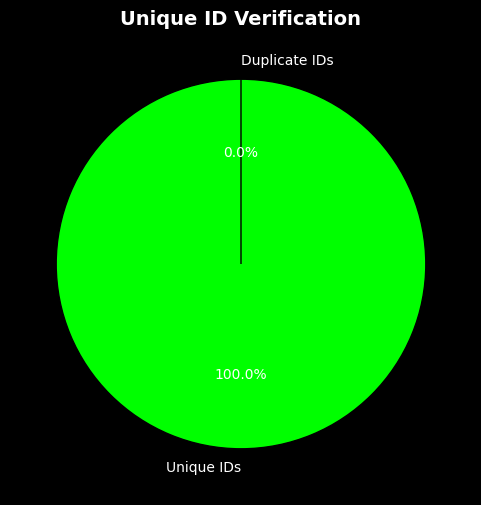

In [8]:
num_unique_ids = df["id"].nunique()
total_rows = len(df)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([num_unique_ids, total_rows - num_unique_ids], labels=["Unique IDs", "Duplicate IDs"], 
       autopct="%1.1f%%", colors=["lime", "red"], startangle=90, wedgeprops={'edgecolor': 'black'})
ax.set_title("Unique ID Verification", fontsize=14, fontweight="bold", color="white")
plt.show()

### **Numerical Feature Distributions (Boxplots)**

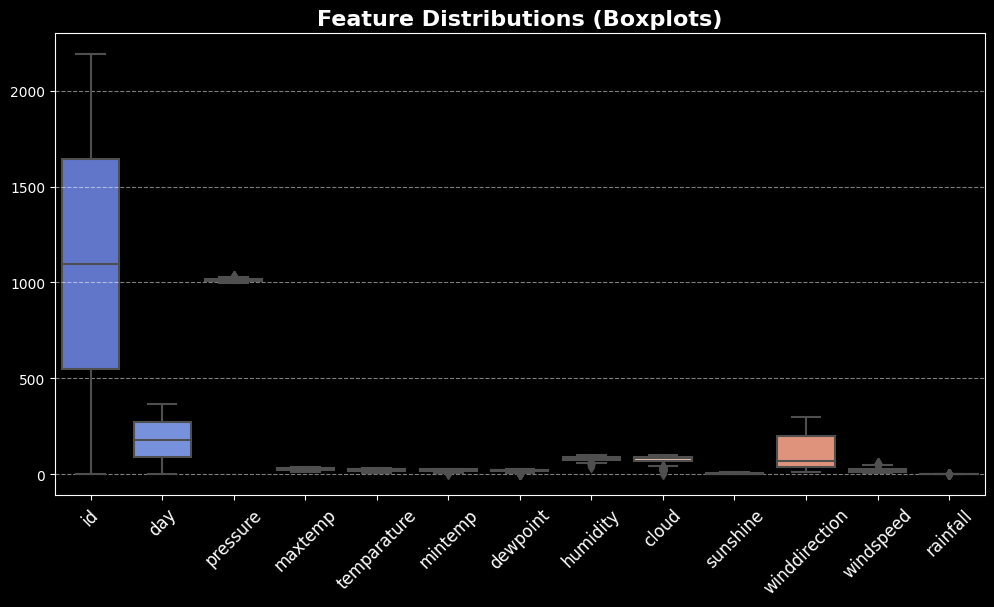

In [9]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], palette="coolwarm")
plt.xticks(rotation=45, fontsize=12, color="white")
plt.title("Feature Distributions (Boxplots)", fontsize=16, fontweight="bold", color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## **2️⃣ Target Variable Analysis (rainfall)**

In [10]:
rainfall_counts = df["rainfall"].value_counts()

### **Rainfall Distribution (Bar Chart)**

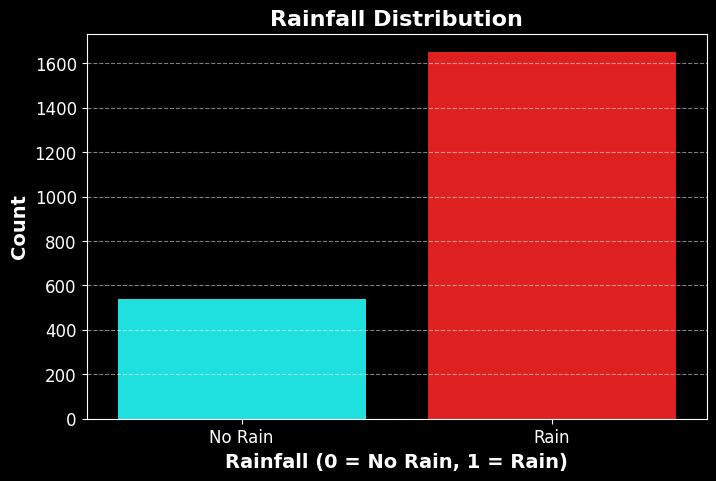

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=rainfall_counts.index, y=rainfall_counts.values, palette=["cyan", "red"])
plt.xticks([0, 1], ["No Rain", "Rain"], fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)", fontsize=14, fontweight="bold", color="white")
plt.ylabel("Count", fontsize=14, fontweight="bold", color="white")
plt.title("Rainfall Distribution", fontsize=16, fontweight="bold", color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Class Imbalance (Pie Chart)**

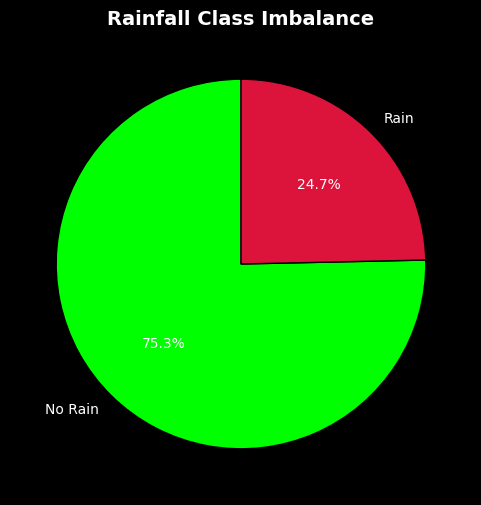

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(rainfall_counts, labels=["No Rain", "Rain"], autopct="%1.1f%%", 
       colors=["lime", "crimson"], startangle=90, wedgeprops={'edgecolor': 'black'})
ax.set_title("Rainfall Class Imbalance", fontsize=14, fontweight="bold", color="white")
plt.show()

### **Rainy vs. Non-Rainy Days Ratio (Annotated Bar Plot)**

In [13]:
rain_ratio = rainfall_counts[1] / rainfall_counts[0]

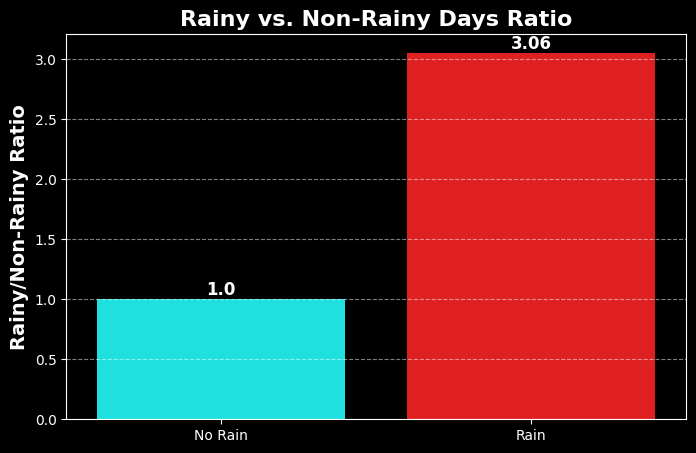

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["No Rain", "Rain"], y=[1, rain_ratio], palette=["cyan", "red"])
plt.text(0, 1, "1.0", ha="center", va="bottom", fontsize=12, color="white", fontweight="bold")
plt.text(1, rain_ratio, f"{rain_ratio:.2f}", ha="center", va="bottom", fontsize=12, color="white", fontweight="bold")
plt.ylabel("Rainy/Non-Rainy Ratio", fontsize=14, fontweight="bold", color="white")
plt.title("Rainy vs. Non-Rainy Days Ratio", fontsize=16, fontweight="bold", color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## **3️⃣ Univariate Analysis**

In [15]:
# Select only numerical columns (excluding 'id' and 'rainfall' for now)
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col not in ["id", "rainfall"]]

cols = 3
rows = math.ceil(len(num_cols) / cols)

### **Histograms + KDE Plots**

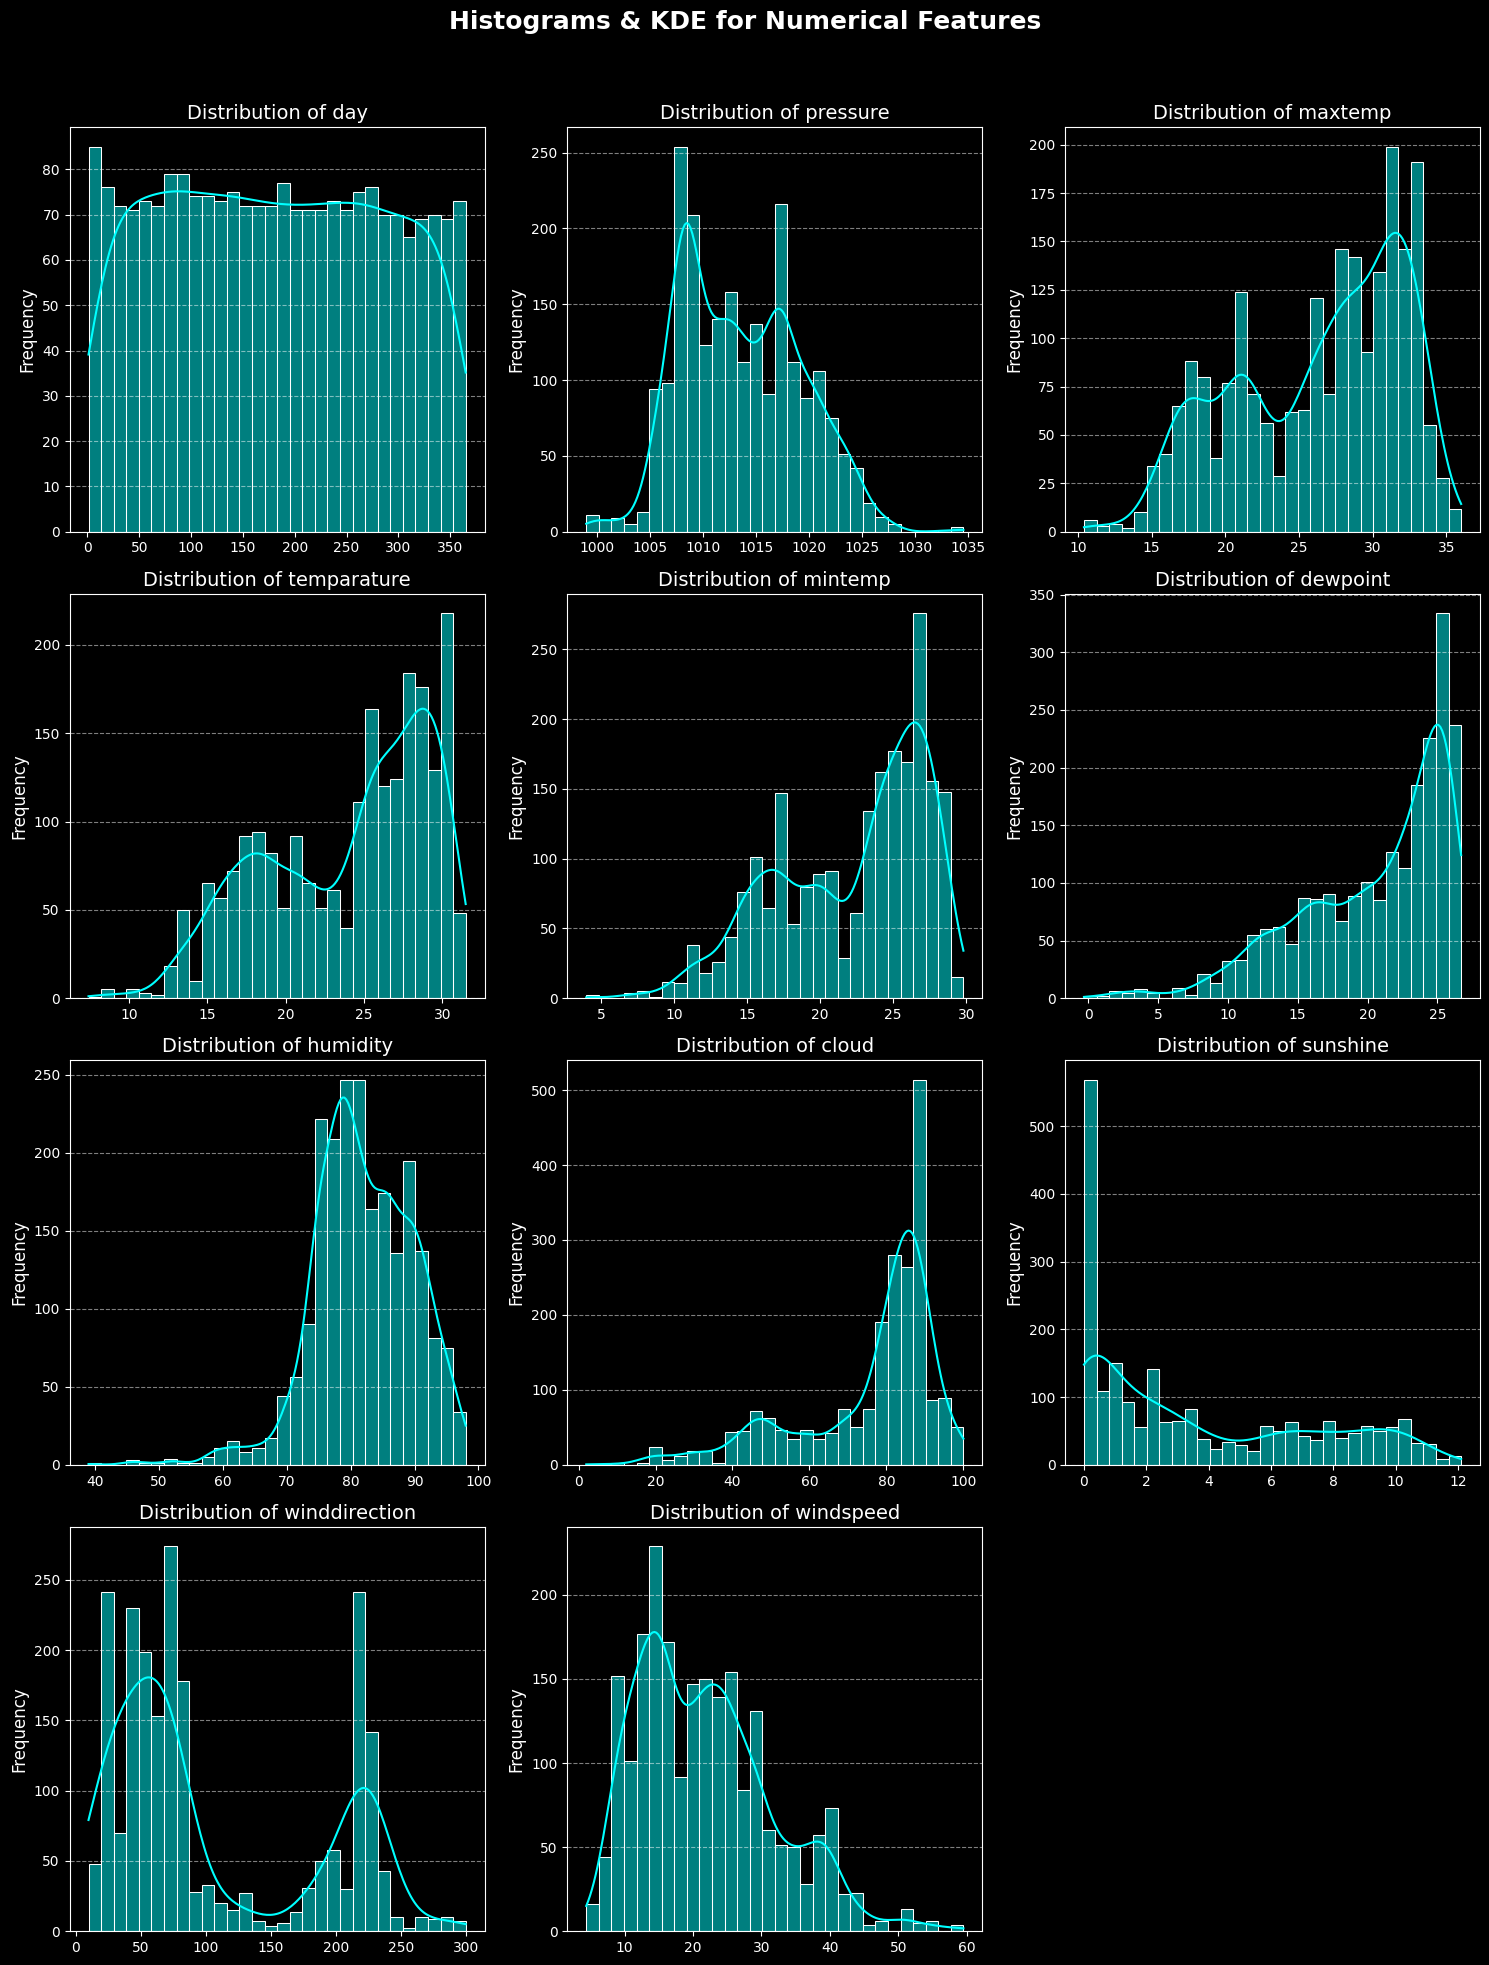

In [16]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
fig.suptitle("Histograms & KDE for Numerical Features", fontsize=18, fontweight="bold", color="white")

# Flatten axes array if it's multi-dimensional
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color="cyan", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14, color="white")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency", fontsize=12, color="white")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Boxplots for Outlier Detection**

In [17]:
cols = 3  
rows = math.ceil(len(num_cols) / cols)  

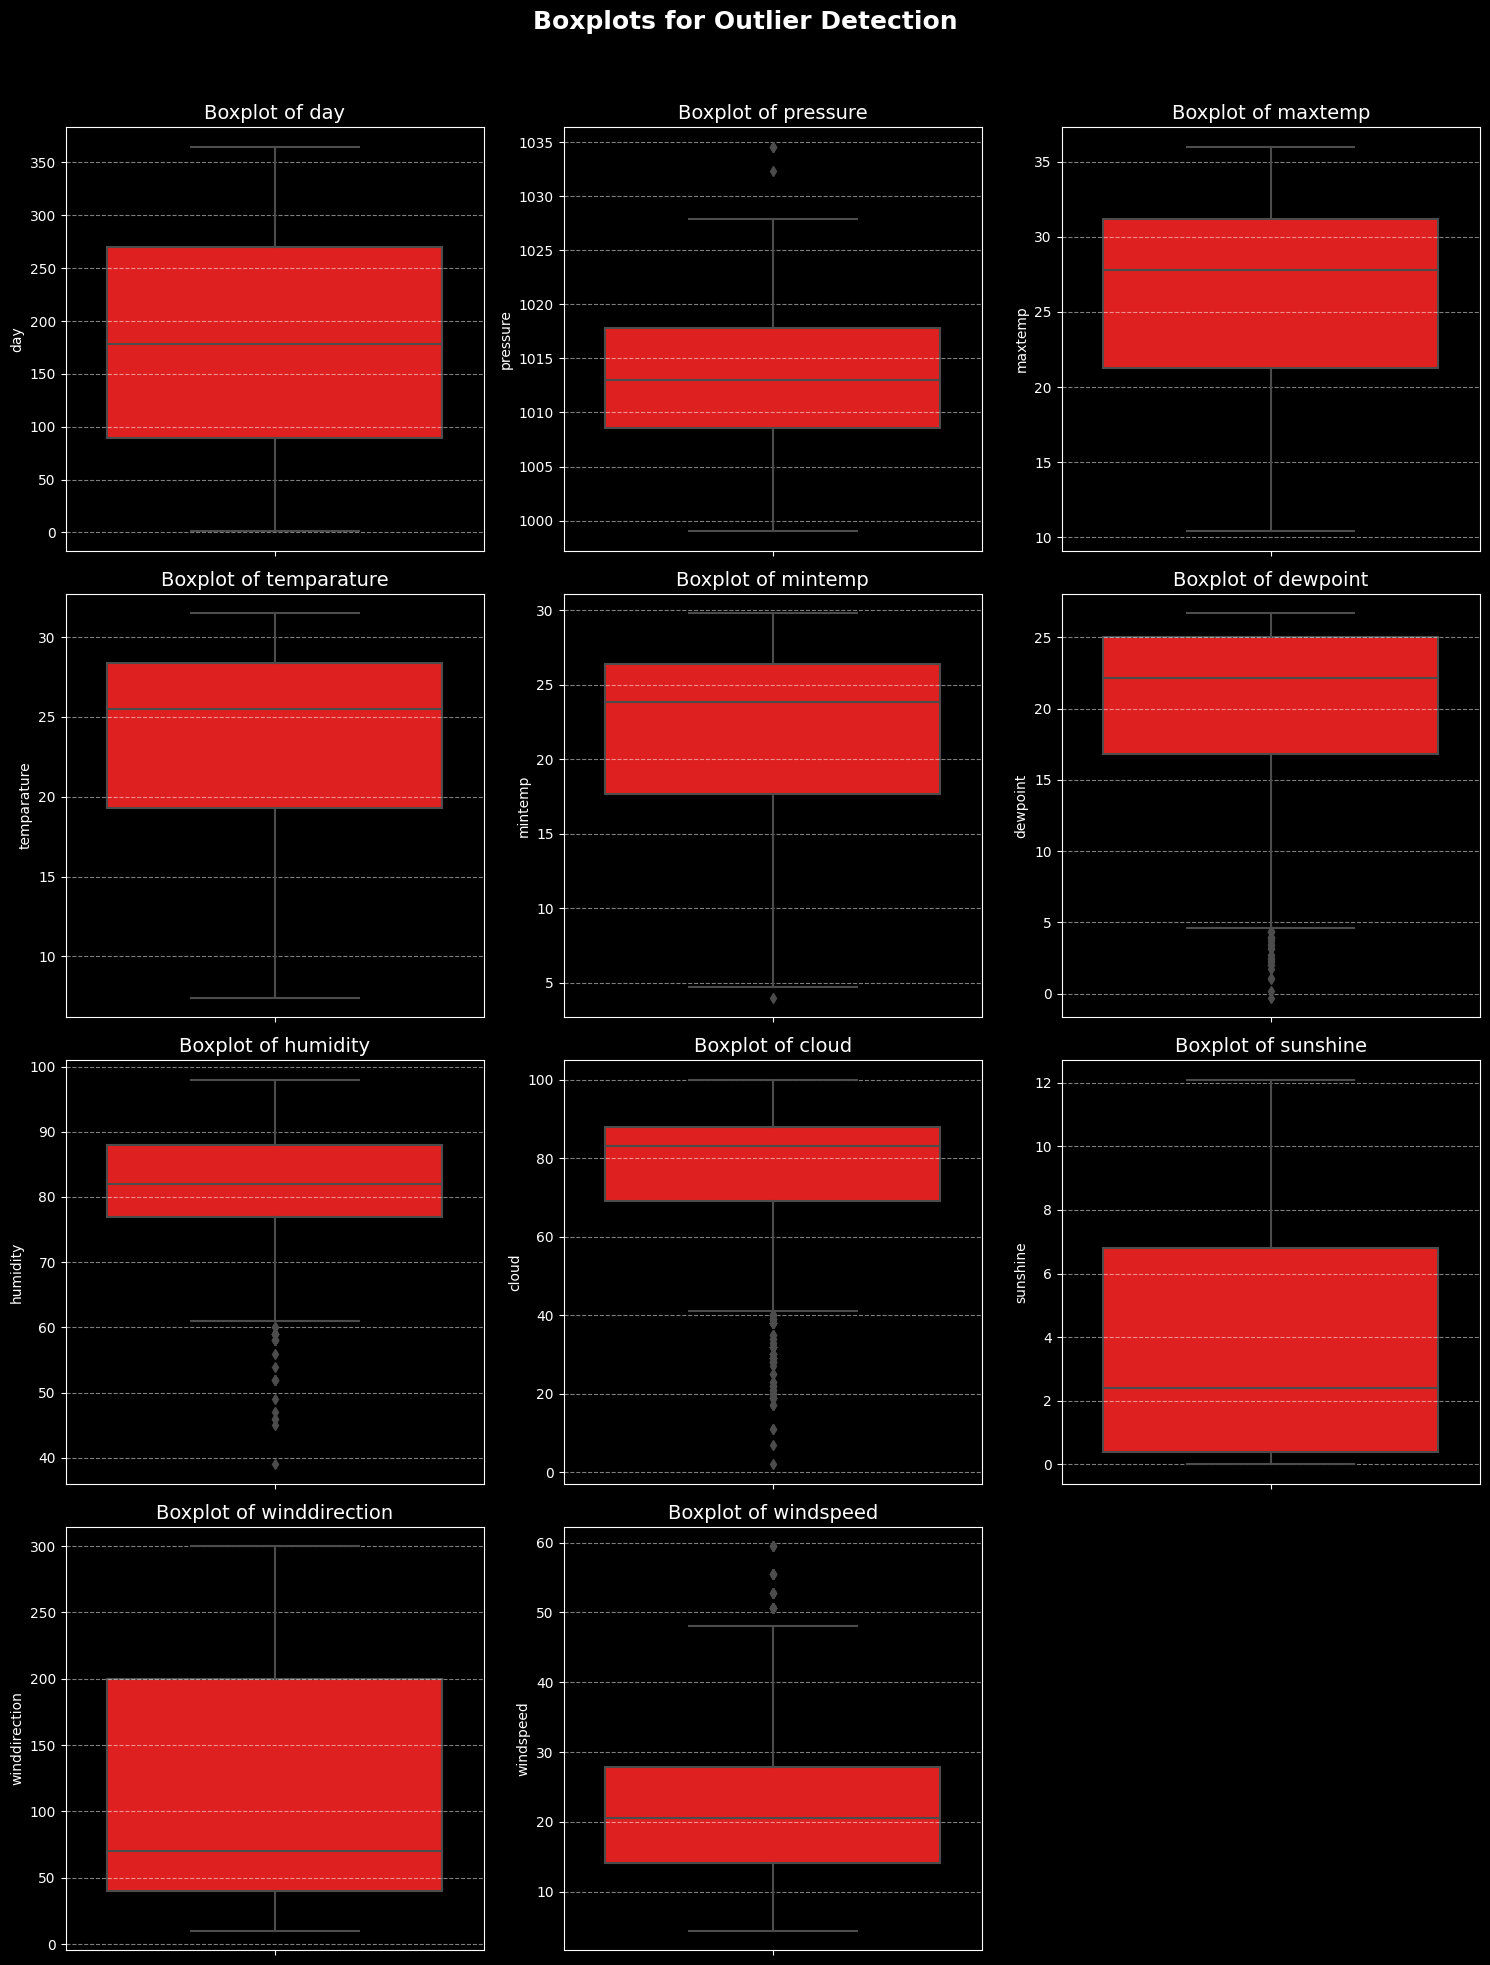

In [18]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
fig.suptitle("Boxplots for Outlier Detection", fontsize=18, fontweight="bold", color="white")

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], color="red", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=14, color="white")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Skewness & Kurtosis Calculation**

In [19]:
skewness_values = {col: skew(df[col], nan_policy="omit") for col in num_cols}
kurtosis_values = {col: kurtosis(df[col], nan_policy="omit") for col in num_cols}

stats_df = pd.DataFrame({"Skewness": skewness_values, "Kurtosis": kurtosis_values})
print("\nSkewness & Kurtosis for Numerical Features:\n")
print(stats_df)


Skewness & Kurtosis for Numerical Features:

               Skewness  Kurtosis
day            0.030594 -1.193022
pressure       0.283868 -0.504590
maxtemp       -0.490554 -0.907714
temparature   -0.557089 -0.835952
mintemp       -0.648734 -0.609601
dewpoint      -0.997206  0.414585
humidity      -0.561156  1.393207
cloud         -1.338357  1.048756
sunshine       0.639433 -1.016620
winddirection  0.707578 -1.072168
windspeed      0.768863  0.281928


### **Rainfall Trend Across Days**

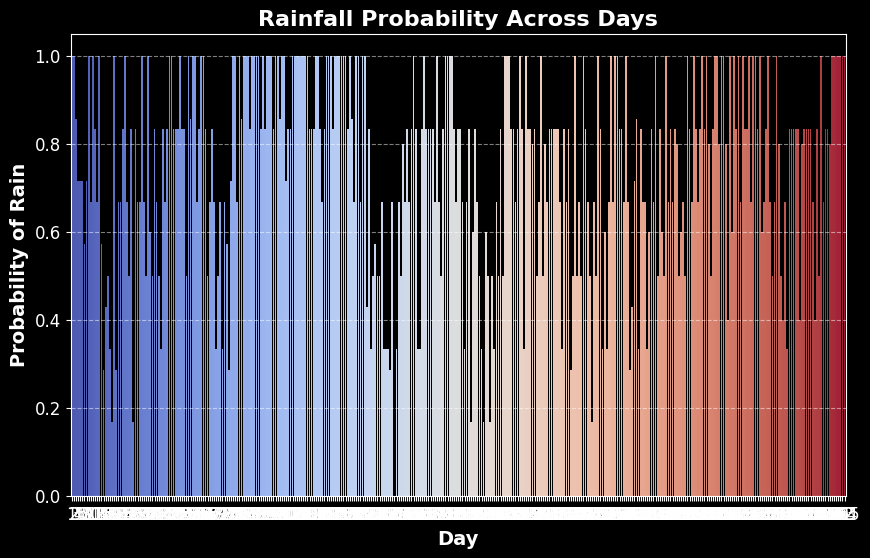

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.groupby("day")["rainfall"].mean().index, 
            y=df.groupby("day")["rainfall"].mean().values, 
            palette="coolwarm")

plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")
plt.xlabel("Day", fontsize=14, fontweight="bold", color="white")
plt.ylabel("Probability of Rain", fontsize=14, fontweight="bold", color="white")
plt.title("Rainfall Probability Across Days", fontsize=16, fontweight="bold", color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## **4️⃣ Bivariate Analysis (Feature Relationships)**

### **Pairplot - Feature Relationships**

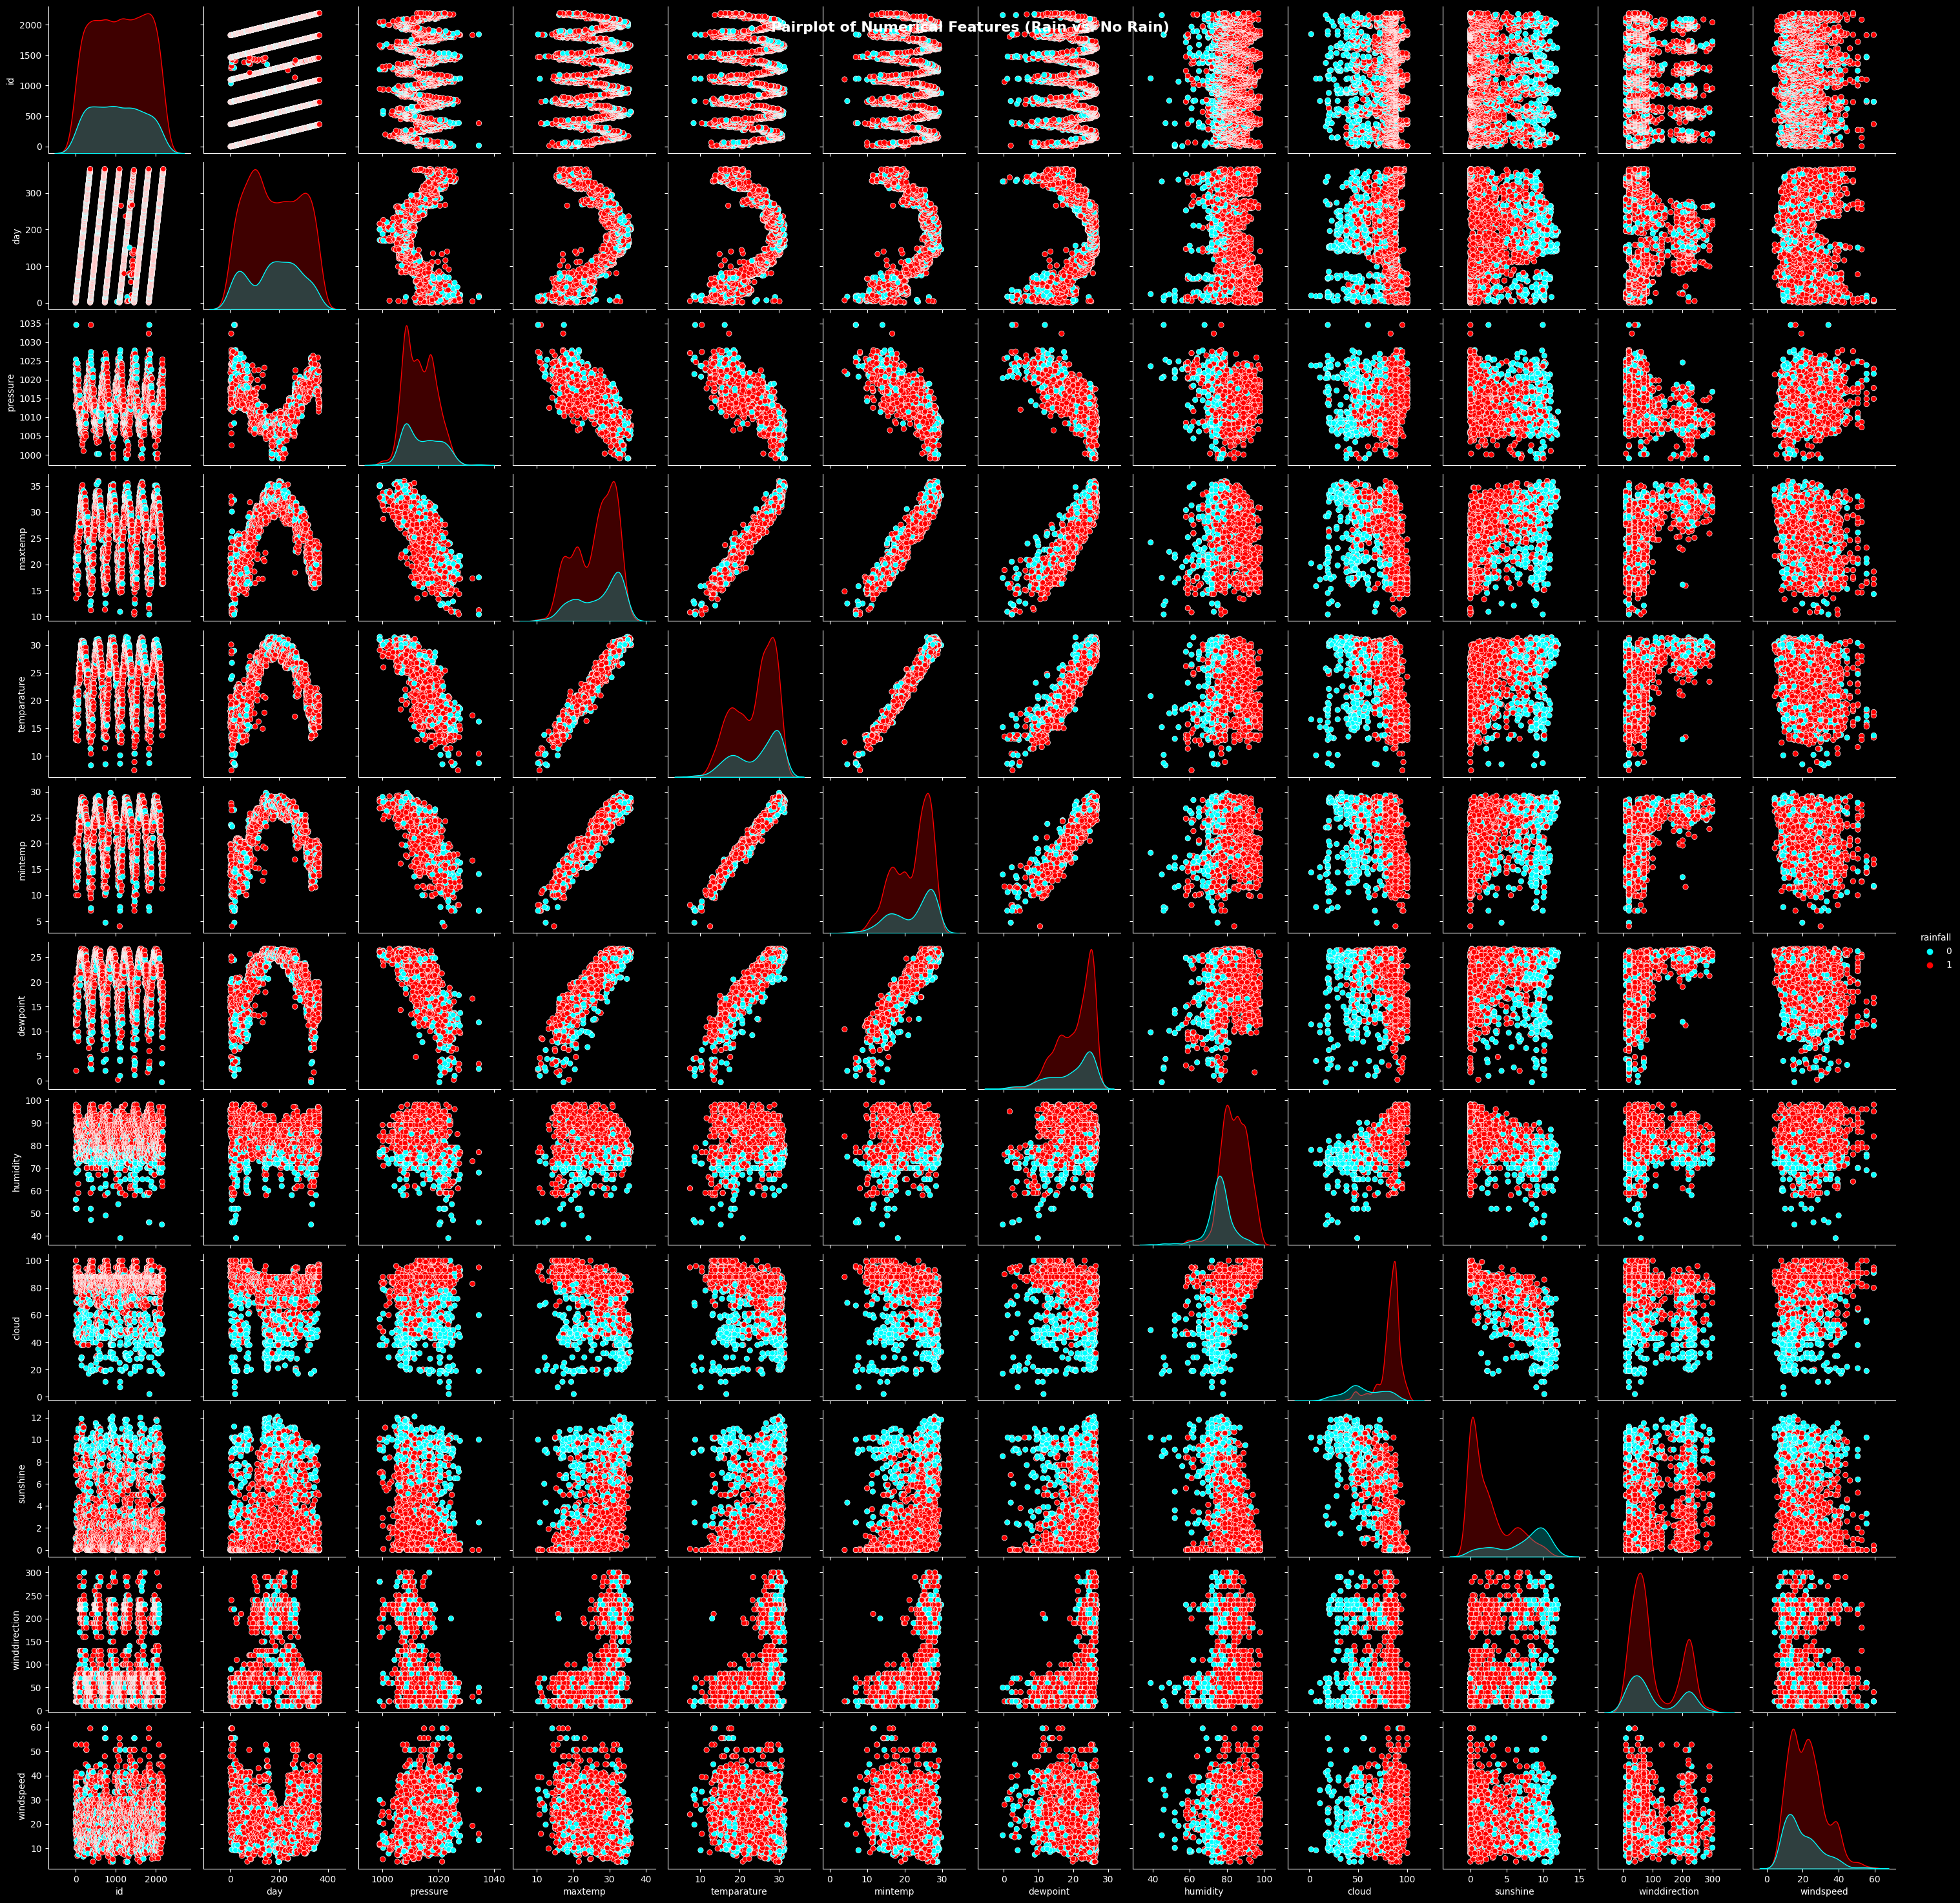

In [21]:
sns.pairplot(df, hue="rainfall", diag_kind="kde", palette=["cyan", "red"])

plt.suptitle("Pairplot of Numerical Features (Rain vs. No Rain)", fontsize=16, fontweight="bold", color="white")
plt.show()

### **Boxplot: Rainfall Across Temperature Ranges**

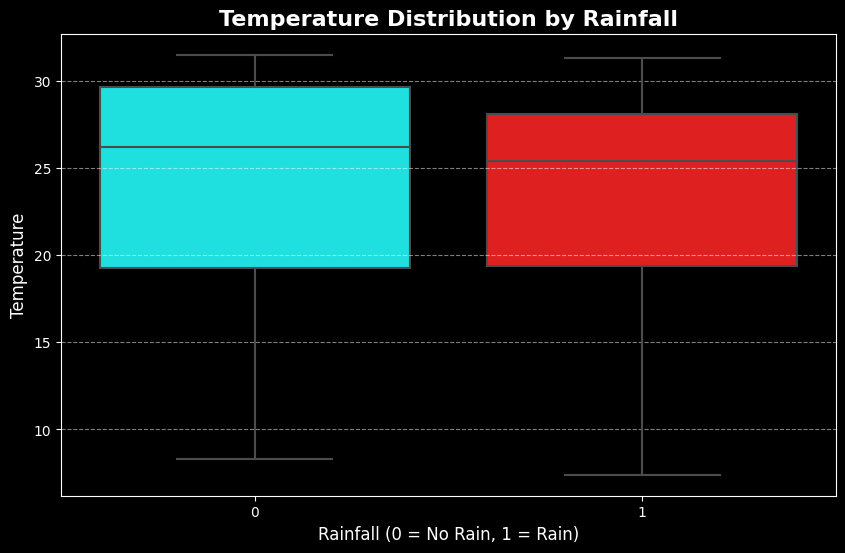

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["rainfall"], y=df["temparature"], palette=["cyan", "red"])

plt.title("Temperature Distribution by Rainfall", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)", fontsize=12, color="white")
plt.ylabel("Temperature", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Humidity vs. Rainfall**

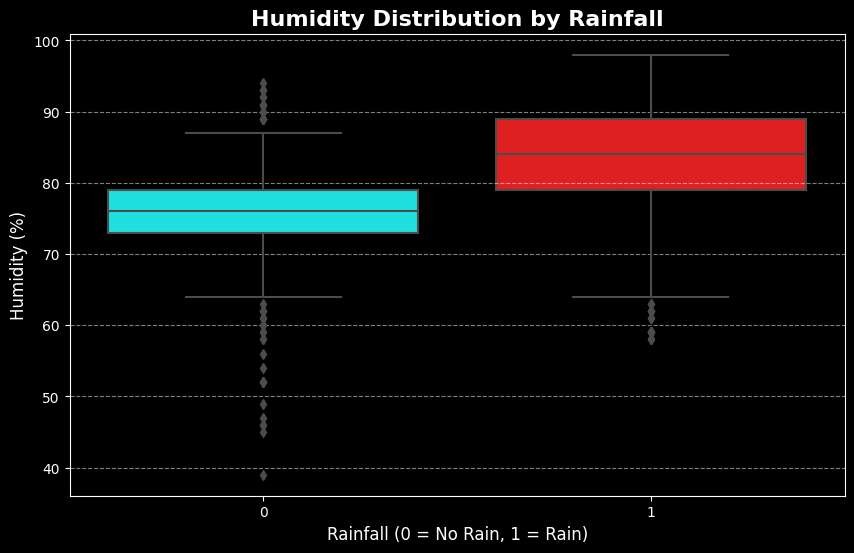

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["rainfall"], y=df["humidity"], palette=["cyan", "red"])

plt.title("Humidity Distribution by Rainfall", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)", fontsize=12, color="white")
plt.ylabel("Humidity (%)", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Wind Direction vs. Rainfall (Categorical Analysis)**

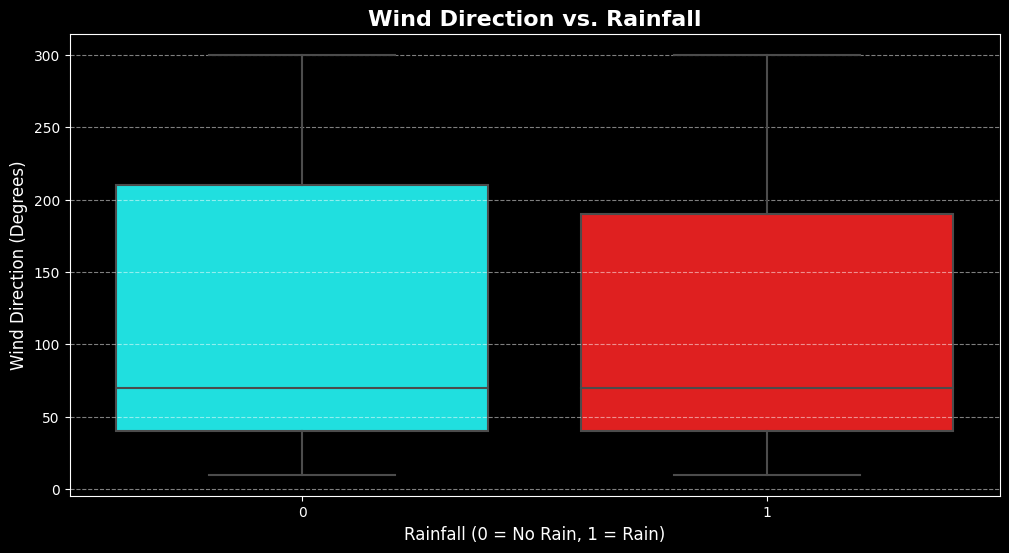

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["rainfall"], y=df["winddirection"], palette=["cyan", "red"])

plt.title("Wind Direction vs. Rainfall", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)", fontsize=12, color="white")
plt.ylabel("Wind Direction (Degrees)", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Dew Point vs. Rainfall**

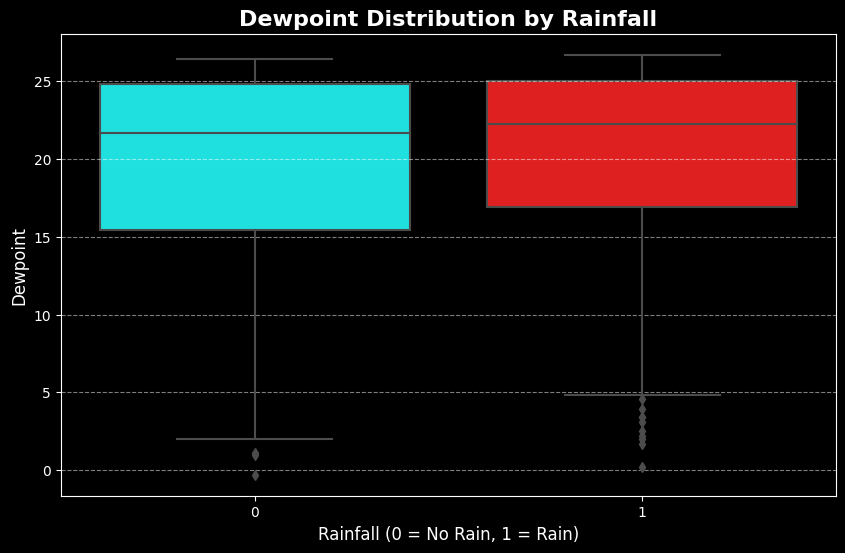

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["rainfall"], y=df["dewpoint"], palette=["cyan", "red"])

plt.title("Dewpoint Distribution by Rainfall", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)", fontsize=12, color="white")
plt.ylabel("Dewpoint", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Cloud Cover vs. Rainfall**

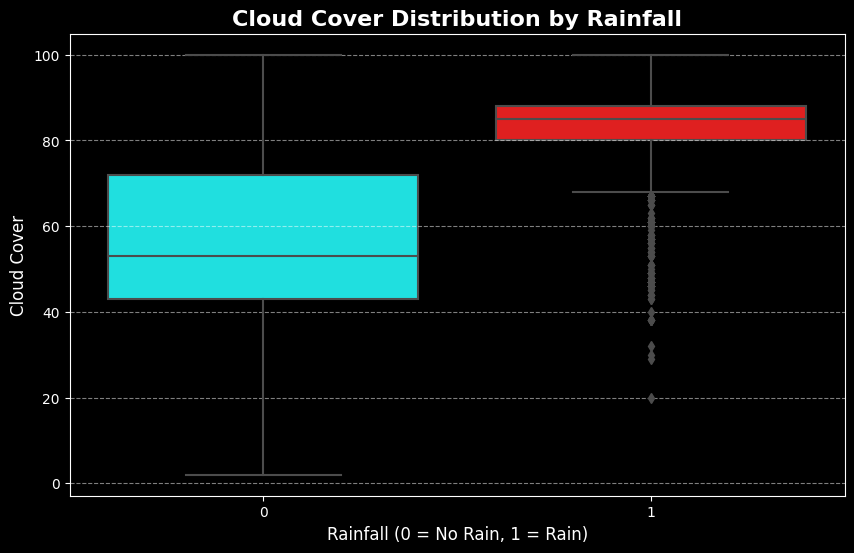

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["rainfall"], y=df["cloud"], palette=["cyan", "red"])

plt.title("Cloud Cover Distribution by Rainfall", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)", fontsize=12, color="white")
plt.ylabel("Cloud Cover", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## **5️⃣ Correlation Analysis**

### **Compute Correlation Matrix**

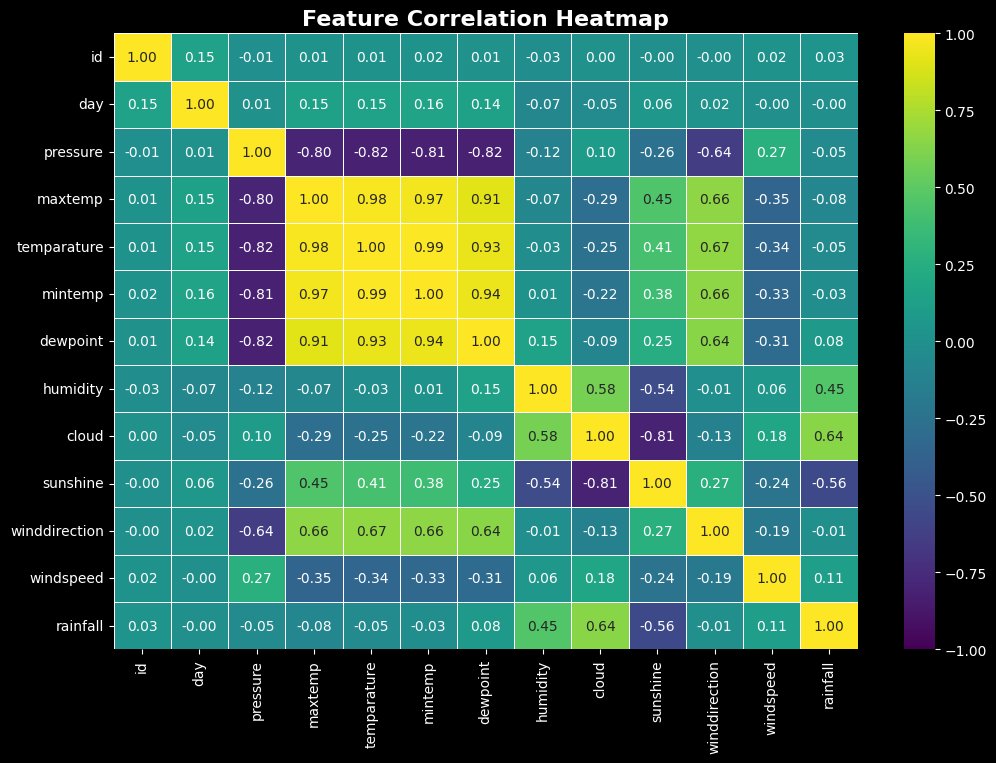

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1) 

plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold", color="white")
plt.show()

### **Highlight Highly Correlated Features (> 0.75)**

In [28]:
threshold = 0.75
high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

high_corr_features = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                      for i in range(len(corr_matrix.index)) 
                      for j in range(i+1, len(corr_matrix.columns)) 
                      if high_corr_pairs.iloc[i, j]]

print("Highly Correlated Feature Pairs:")
for pair in high_corr_features:
    print(f"{pair[0]} ↔ {pair[1]}")

Highly Correlated Feature Pairs:
pressure ↔ maxtemp
pressure ↔ temparature
pressure ↔ mintemp
pressure ↔ dewpoint
maxtemp ↔ temparature
maxtemp ↔ mintemp
maxtemp ↔ dewpoint
temparature ↔ mintemp
temparature ↔ dewpoint
mintemp ↔ dewpoint
cloud ↔ sunshine


### **Pairwise Correlation (Clustermap)**

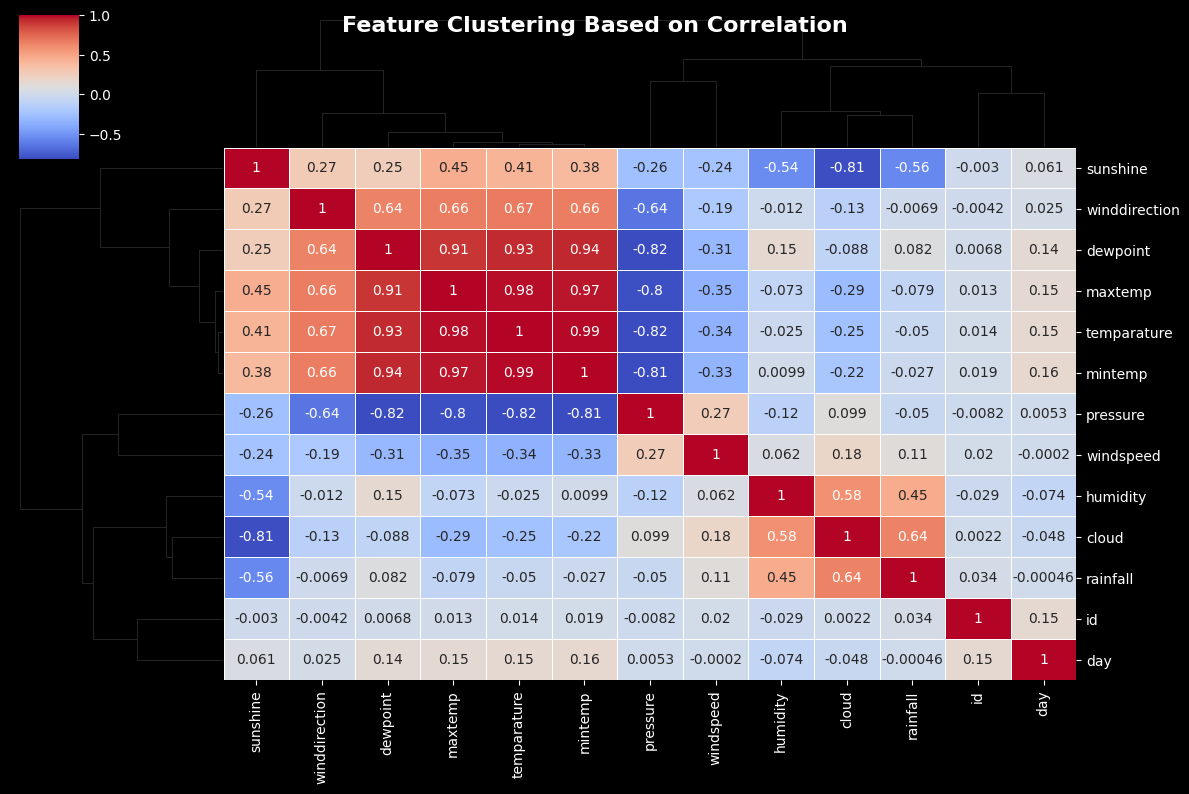

In [29]:
sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, figsize=(12, 8))

plt.suptitle("Feature Clustering Based on Correlation", fontsize=16, fontweight="bold", color="white")
plt.show()

## **6️⃣ Feature Engineering Ideas**

In [30]:
df["temp_range"] = df["maxtemp"] - df["mintemp"]

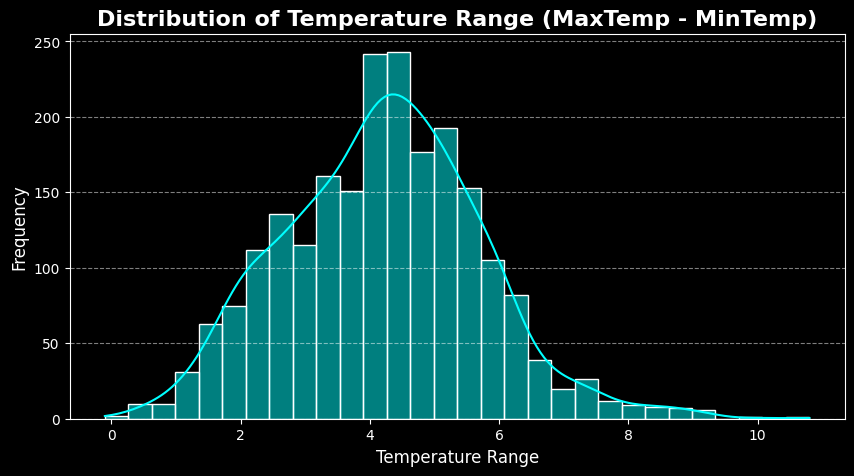

In [31]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))
sns.histplot(df["temp_range"], bins=30, kde=True, color="cyan")

plt.title("Distribution of Temperature Range (MaxTemp - MinTemp)", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Temperature Range", fontsize=12, color="white")
plt.ylabel("Frequency", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Wind Direction Categorization**

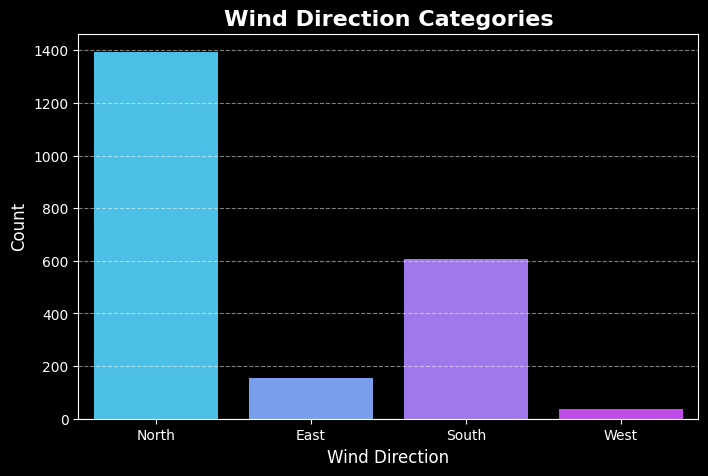

In [32]:
bins = [0, 90, 180, 270, 360]
labels = ["North", "East", "South", "West"]
df["wind_category"] = pd.cut(df["winddirection"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 5))
sns.countplot(x=df["wind_category"], palette="cool")

plt.title("Wind Direction Categories", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Wind Direction", fontsize=12, color="white")
plt.ylabel("Count", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Weekend vs. Weekday Analysis**

In [33]:
df["is_weekend"] = df["day"] % 7 >= 5

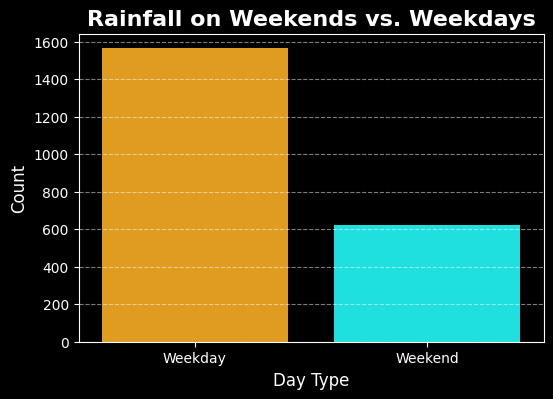

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["is_weekend"].map({True: "Weekend", False: "Weekday"}), palette=["orange", "cyan"])

plt.title("Rainfall on Weekends vs. Weekdays", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Day Type", fontsize=12, color="white")
plt.ylabel("Count", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Interaction Feature: Humidity × Cloud Cover**

In [35]:
df["humidity_cloud_interaction"] = df["humidity"] * df["cloud"]

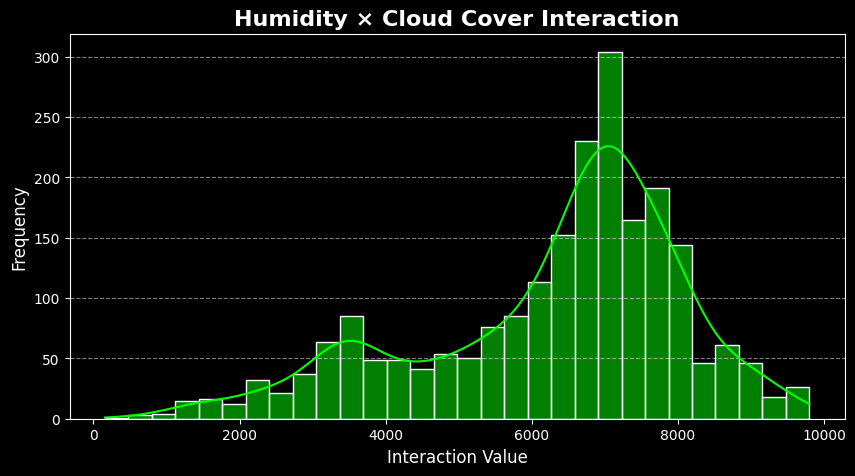

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df["humidity_cloud_interaction"], bins=30, kde=True, color="lime")

plt.title("Humidity × Cloud Cover Interaction", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Interaction Value", fontsize=12, color="white")
plt.ylabel("Frequency", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Binary Sunshine Feature**

In [37]:
threshold = df["sunshine"].median()
df["sunshine_binary"] = (df["sunshine"] > threshold).astype(int)

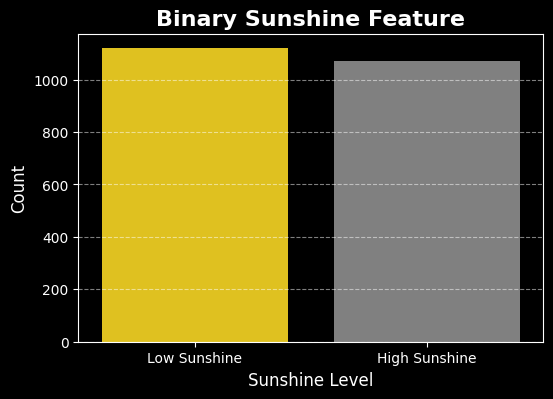

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["sunshine_binary"].map({1: "High Sunshine", 0: "Low Sunshine"}), palette=["gold", "gray"])

plt.title("Binary Sunshine Feature", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Sunshine Level", fontsize=12, color="white")
plt.ylabel("Count", fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## **7️⃣ Outliers Detection**

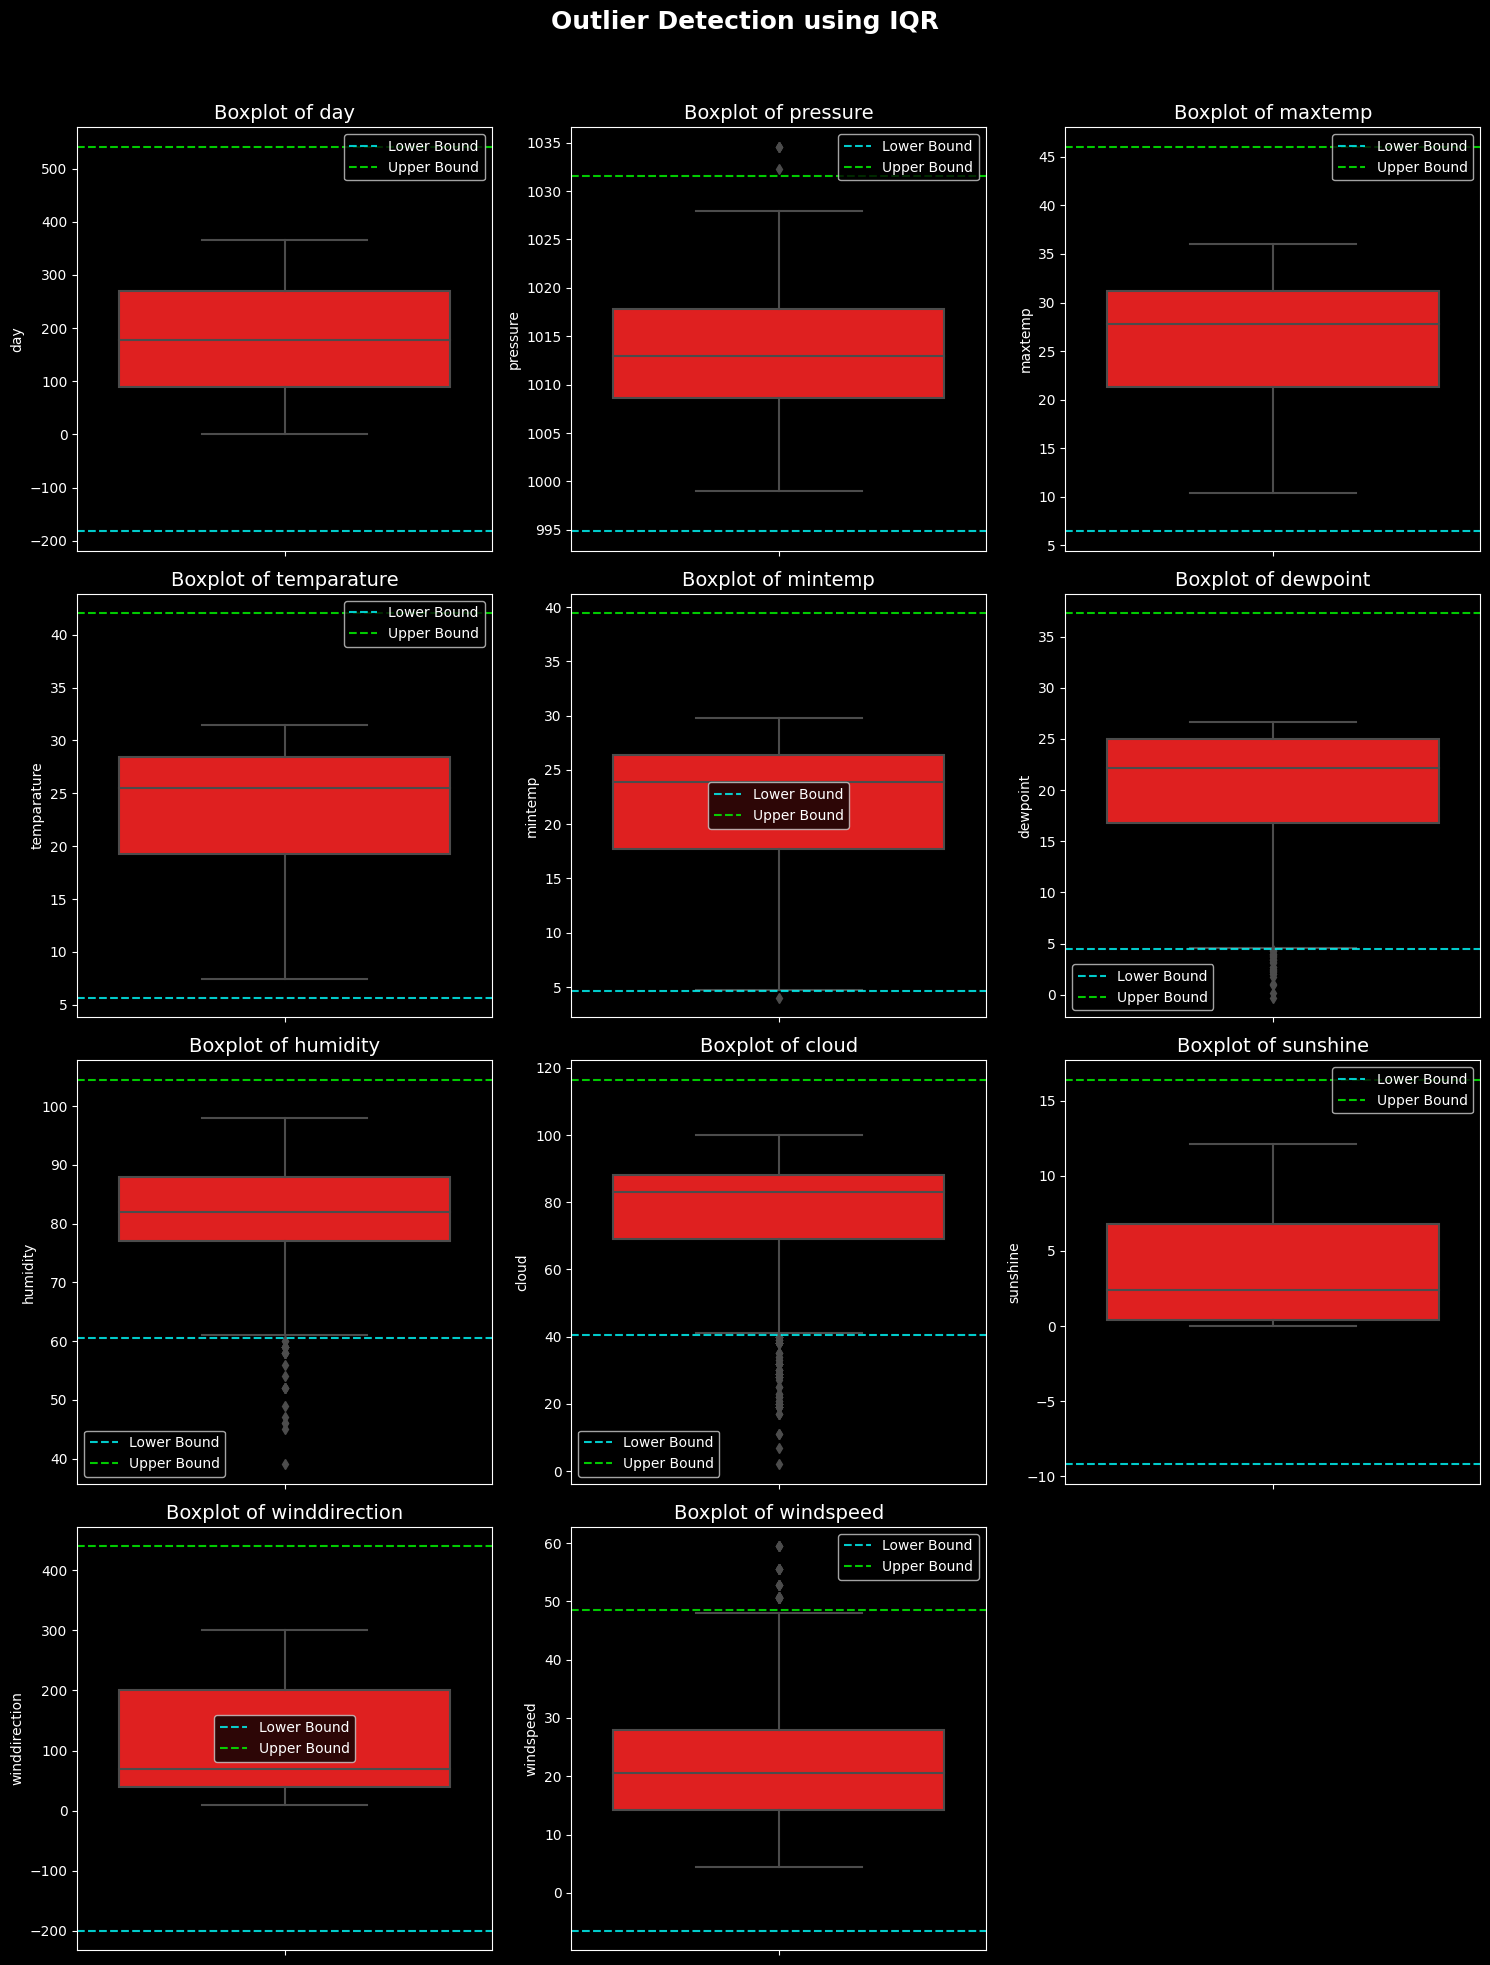

In [39]:
num_plots = len(num_cols)
rows = int(np.ceil(num_plots / 3)) 

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
fig.suptitle("Outlier Detection using IQR", fontsize=18, fontweight="bold", color="white")

axes = axes.flatten()

for i, col in enumerate(num_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    sns.boxplot(y=df[col], color="red", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=14, color="white")
    axes[i].axhline(lower_bound, linestyle="--", color="cyan", alpha=0.8, label="Lower Bound")
    axes[i].axhline(upper_bound, linestyle="--", color="lime", alpha=0.8, label="Upper Bound")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Z-Score Method**

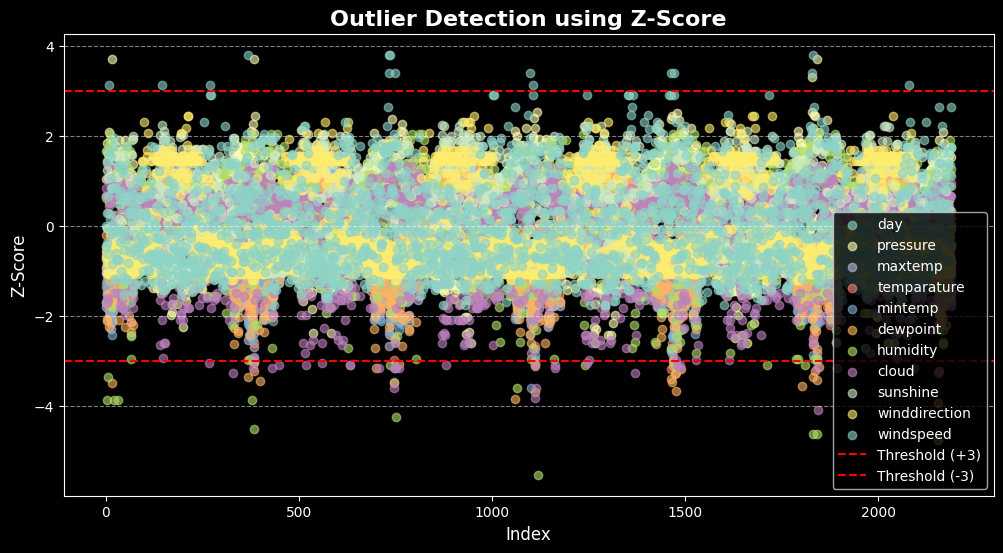

In [40]:
plt.figure(figsize=(12, 6))
for col in num_cols:
    df[f"{col}_zscore"] = zscore(df[col])  

    plt.scatter(df.index, df[f"{col}_zscore"], label=col, alpha=0.6)
    
plt.axhline(y=3, color="red", linestyle="--", linewidth=1.5, label="Threshold (+3)")
plt.axhline(y=-3, color="red", linestyle="--", linewidth=1.5, label="Threshold (-3)")

plt.title("Outlier Detection using Z-Score", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Index", fontsize=12, color="white")
plt.ylabel("Z-Score", fontsize=12, color="white")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### **Boxplots for Outlier Visualization**

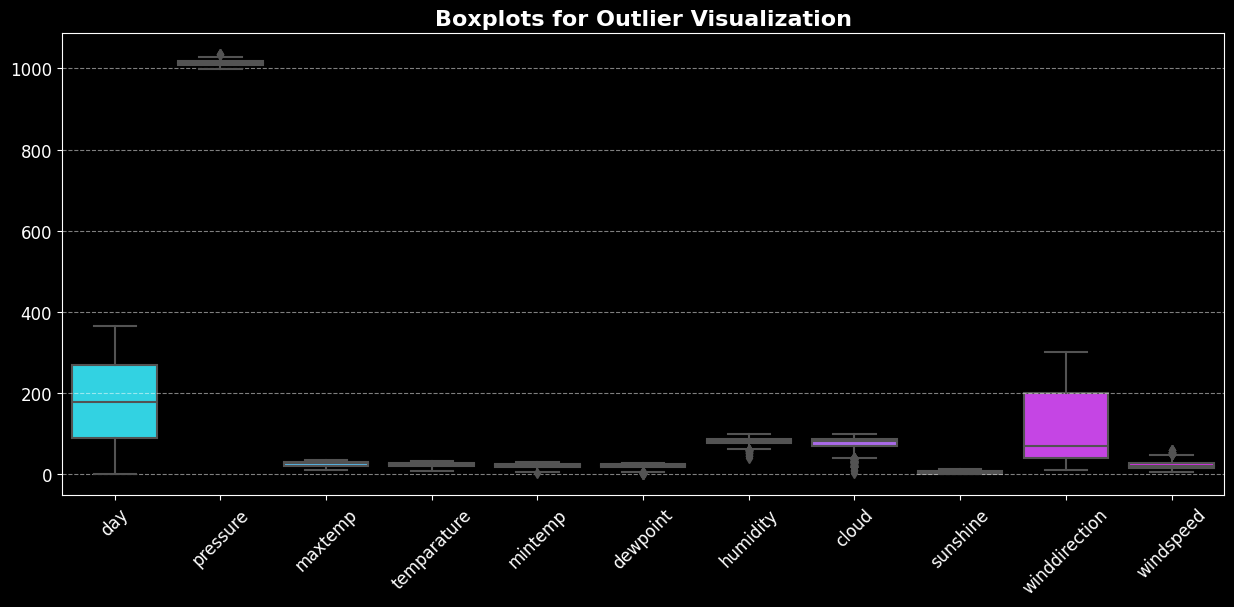

In [41]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[num_cols], palette="cool")

plt.title("Boxplots for Outlier Visualization", fontsize=16, fontweight="bold", color="white")
plt.xticks(rotation=45, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# 🎉 **Thank You for Exploring!** 🙌  

I appreciate your time and effort in going through this notebook! 🚀  
I hope this analysis provided valuable insights and helped you understand the dataset better. 📊  

If you found this notebook helpful, feel free to  share your thoughts! 💡  
Happy Coding! 💻✨  

---
🔗 **Stay Connected & Keep Learning!** 📚🚀  
